# Inspect parameters of IBL model fit to IBL sessions

This notebook examines the output of the script `fit_ibl_all.py`, which fits the IBL model to behavior data from each of the selected IBL sessions. The distributions of the hazard rate $h$, side probability $a$ and bias $w_0$ parameters seem to be closely concentrated around the ground-truth experimental values of these parameters. This means that in most of the 'trained' sessions, the animals are behaving in a way roughly consistent with the IBL model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.special import logit, expit

## Load and preprocess trained parameters

In [2]:
df = pd.read_csv('../data/ibl/ibl_params.csv', index_col=0)
df

,h,a,w_0,w_1
0,0.059799,0.692378,-0.285628,4.338369
1,0.440829,1.000000,-1.414074,0.957510
2,0.029485,0.224732,-0.049566,4.022512
3,0.036052,0.655331,-0.594451,3.348424
4,0.004738,0.273986,-1.510648,3.068086
...,...,...,...,...
3799,0.134901,0.832846,-0.410120,16.885653
3800,0.141517,0.200722,-0.546656,18.626916
3801,0.025518,0.235257,-0.158355,11.810004
3802,0.086173,0.179325,-0.769451,30.015691


In [3]:
# Add logit_h column (this is the parameter that's actually learned)
df['logit_h'] = df.apply(lambda row: logit(row['h']), axis=1)
df

,h,a,w_0,w_1,logit_h
0,0.059799,0.692378,-0.285628,4.338369,-2.755106
1,0.440829,1.000000,-1.414074,0.957510,-0.237796
2,0.029485,0.224732,-0.049566,4.022512,-3.493929
3,0.036052,0.655331,-0.594451,3.348424,-3.286080
4,0.004738,0.273986,-1.510648,3.068086,-5.347464
...,...,...,...,...,...
3799,0.134901,0.832846,-0.410120,16.885653,-1.858305
3800,0.141517,0.200722,-0.546656,18.626916,-1.802748
3801,0.025518,0.235257,-0.158355,11.810004,-3.642530
3802,0.086173,0.179325,-0.769451,30.015691,-2.361282


In [4]:
# Drop rows with extremely large or small h-values
nrows_raw = len(df)
df = df[(df.h < 1.0) & (df.h > 0.00001)]
nrows_clean = len(df)

print(f'num dropped: {nrows_raw - nrows_clean}')

num dropped: 51


## Examine distributions of trained parameters

### Hazard rate ($h$ and $\text{logit}(h)$)

h_true: 0.0196078431372549
h_mean: 0.09437784054099066
h_median: 0.044270698089998


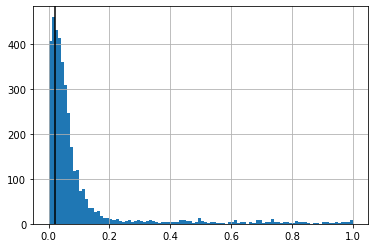

In [5]:
h_true = 1 / 51
h_mean = df['h'].mean()
h_median = df['h'].median()

print(f'h_true: {h_true}')
print(f'h_mean: {h_mean}')
print(f'h_median: {h_median}')

ax = df['h'].hist(bins=100)
ax.axvline(h_true, color='black');

logit_h_true: -3.912023005428146
logit_h_mean: -3.044830278399883
logit_h_median: -3.0721517004193037


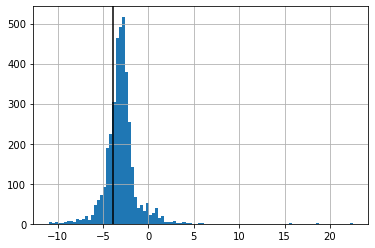

In [10]:
logit_h_true = logit(h_true)
logit_h_mean = df['logit_h'].mean()
logit_h_median = df['logit_h'].median()

print(f'logit_h_true: {logit_h_true}')
print(f'logit_h_mean: {logit_h_mean}')
print(f'logit_h_median: {logit_h_median}')

ax = df['logit_h'].hist(bins=100)
ax.axvline(logit_h_true, color='black');


### Side probability ($a$)

a_true: 0.8
a_mean: 0.49595375727867624
a_median: 0.4999999733324315


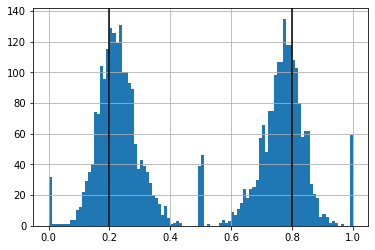

In [7]:
a_true = 0.8
a_mean = df['a'].mean()
a_median = df['a'].median()

print(f'a_true: {a_true}')
print(f'a_mean: {a_mean}')
print(f'a_median: {a_median}')

ax = df['a'].hist(bins=100)
ax.axvline(a_true, color='black')
ax.axvline(1 - a_true, color='black');

**Note:** Code is learning $a$-value correctly, but this isn't reflected in mean because there are _two_ equivalent values of $a$: 0.8 and 0.2. The optimization routine lands on each of these about half the time, so the mean and median end up being around 0.5. Is there some way we can disambiguate this?

### Bias ($w_0$)

w0_true: 0.0
w0_mean: 0.0029901579735812957
w0_median: -0.0134430529659513


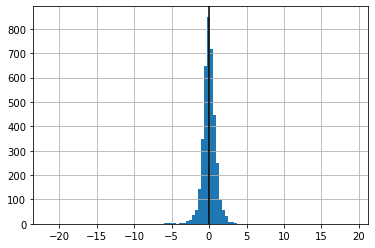

In [8]:
w0_true = 0.0
w0_mean = df['w_0'].mean()
w0_median = df['w_0'].median()

print(f'w0_true: {w0_true}')
print(f'w0_mean: {w0_mean}')
print(f'w0_median: {w0_median}')

ax = df['w_0'].hist(bins=100)
ax.axvline(w0_true, color='black');

### Coefficient ($w_1$)

w1_mean: 7.730805296778847
w1_median: 6.136818770643815


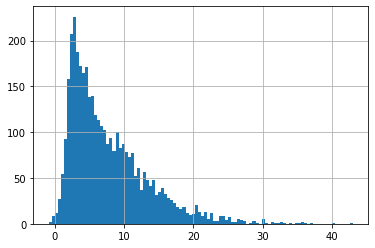

In [9]:
w1_mean = df['w_1'].mean()
w1_median = df['w_1'].median()

print(f'w1_mean: {w1_mean}')
print(f'w1_median: {w1_median}')

ax = df['w_1'].hist(bins=100)